# WAZE CUSTOMER CHURN PROJECT

## Background

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely.

We are going to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn.

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as:

* Who are the users most likely to churn?

* Why do users churn?

* When do users churn?

## Column Descriptions

* label (obj): This is the binary target variable indicating whether a user has churned ("retained") or remained active ("churned") during the month.

* sessions (int): The number of times a user opened the Waze app during the month.

* drives (int): The number of occurrences where a user drove at least 1 kilometer using the app during the month.

* device (obj): The type of device that a user used to start a session with the Waze app.

* total_sessions (float): A model estimate of the total number of sessions a user has had since they onboarded to the app.

* n_days_after_onboarding (int): The number of days that have passed since a user signed up for the Waze app.

* total_navigations_fav1 (int): The total number of navigations a user has made to their favorite place 1 since onboarding.

* total_navigations_fav2 (int): The total number of navigations a user has made to their favorite place 2 since onboarding.

* driven_km_drives (float): The total number of kilometers driven by the user during the month.

* duration_minutes_drives (float): The total duration, in minutes, driven by the user during the month.

* activity_days (int): The number of days in the month during which the user opened the Waze app.

* driving_days (int): The number of days in the month during which the user drove at least 1 kilometer using the app.

## Importing Dictionaries

In [77]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from xgboost import plot_importance


# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV


# To undersample and oversample the data
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data = pd.read_csv('waze_dataset.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748,2276,208,0,2628.845,1985.775,28,19,Android
1,1,retained,133,107,326.897,1225,19,64,13715.921,3160.473,13,11,iPhone
2,2,retained,114,95,135.523,2651,0,0,3059.149,1610.736,14,8,Android
3,3,retained,49,40,67.589,15,322,7,913.591,587.197,7,3,iPhone
4,4,retained,84,68,168.247,1562,166,5,3950.202,1219.556,27,18,Android


In [5]:
df.shape

(14999, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.000,7499.000,4329.983,0.000,3749.500,7499.000,11248.500,14998.000
sessions,14999.000,80.634,80.699,0.000,23.000,56.000,112.000,743.000
drives,14999.000,67.281,65.914,0.000,20.000,48.000,93.000,596.000
total_sessions,14999.000,189.964,136.405,0.220,90.661,159.568,254.192,1216.155
n_days_after_onboarding,14999.000,1749.838,1008.514,4.000,878.000,1741.000,2623.500,3500.000
total_navigations_fav1,14999.000,121.606,148.122,0.000,9.000,71.000,178.000,1236.000
total_navigations_fav2,14999.000,29.673,45.395,0.000,0.000,9.000,43.000,415.000
driven_km_drives,14999.000,4039.341,2502.149,60.441,2212.601,3493.858,5289.861,21183.402
duration_minutes_drives,14999.000,1860.976,1446.702,18.282,835.996,1478.250,2464.363,15851.727
activity_days,14999.000,15.537,9.005,0.000,8.000,16.000,23.000,31.000


In [8]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [9]:
df.isnull().mean() * 100

ID                        0.000
label                     4.667
sessions                  0.000
drives                    0.000
total_sessions            0.000
n_days_after_onboarding   0.000
total_navigations_fav1    0.000
total_navigations_fav2    0.000
driven_km_drives          0.000
duration_minutes_drives   0.000
activity_days             0.000
driving_days              0.000
device                    0.000
dtype: float64

* There are 700 missing values in the label column which encompasses less than 5% of the entire dataset hence we aree going to drop the missing values

In [10]:
df[df['label'].isnull()]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
77,77,NaN,63,50,133.104,783,201,0,2649.016,1517.210,19,13,iPhone
80,80,NaN,116,93,436.060,1584,283,62,4183.410,3121.890,18,15,iPhone
98,98,NaN,78,64,583.493,3414,0,0,1811.141,642.189,12,11,Android
111,111,NaN,106,102,113.379,2228,14,0,2817.482,2011.724,17,13,Android
142,142,NaN,32,26,222.129,208,55,10,2459.816,874.428,11,7,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,14941,NaN,191,160,485.328,1287,25,0,6468.182,3466.105,14,14,iPhone
14943,14943,NaN,48,38,96.797,555,0,6,8266.129,5902.352,19,19,iPhone
14945,14945,NaN,34,29,134.417,1643,268,2,4554.008,1579.211,18,17,Android
14972,14972,NaN,220,181,256.212,1718,360,23,5586.913,4104.440,19,18,iPhone


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

ID                         14999
label                          2
sessions                     469
drives                       401
total_sessions             14999
n_days_after_onboarding     3441
total_navigations_fav1       730
total_navigations_fav2       287
driven_km_drives           14999
duration_minutes_drives    14999
activity_days                 32
driving_days                  31
device                         2
dtype: int64

* The 'labels' and 'device' columns seem to have 2 distinct values each

In [13]:
print('label unique values:', df['label'].unique())
print('device unique values:', df['device'].unique())

label unique values: ['retained' 'churned' nan]
device unique values: ['Android' 'iPhone']


In [14]:
#rows with missing values
missing_label_rows = df[df['label'].isnull()]

#summary statistics of rows with missing values
missing_label_rows.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,700.000,7405.584,4306.900,77.000,3744.500,7443.000,11007.000,14993.000
sessions,700.000,80.837,79.987,0.000,23.000,56.000,112.250,556.000
drives,700.000,67.799,65.272,0.000,20.000,47.500,94.000,445.000
total_sessions,700.000,198.483,140.562,5.583,94.056,177.256,266.058,1076.880
n_days_after_onboarding,700.000,1709.296,1005.307,16.000,869.000,1650.500,2508.750,3498.000
total_navigations_fav1,700.000,118.717,156.308,0.000,4.000,62.500,169.250,1096.000
total_navigations_fav2,700.000,30.371,46.307,0.000,0.000,10.000,43.000,352.000
driven_km_drives,700.000,3935.967,2443.107,290.120,2119.345,3421.157,5166.097,15135.391
duration_minutes_drives,700.000,1795.123,1419.242,66.588,779.009,1414.966,2443.955,9746.253
activity_days,700.000,15.383,8.773,0.000,8.000,15.000,23.000,31.000


In [15]:
# rows without missing values
non_missing_label_rows = df[~df['label'].isnull()]

# summary stats of rows without missing values
non_missing_label_rows.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14299.000,7503.573,4331.208,0.000,3749.500,7504.000,11257.500,14998.000
sessions,14299.000,80.624,80.737,0.000,23.000,56.000,111.000,743.000
drives,14299.000,67.256,65.947,0.000,20.000,48.000,93.000,596.000
total_sessions,14299.000,189.547,136.190,0.220,90.458,158.719,253.540,1216.155
n_days_after_onboarding,14299.000,1751.823,1008.664,4.000,878.500,1749.000,2627.500,3500.000
total_navigations_fav1,14299.000,121.747,147.713,0.000,10.000,71.000,178.000,1236.000
total_navigations_fav2,14299.000,29.638,45.351,0.000,0.000,9.000,43.000,415.000
driven_km_drives,14299.000,4044.402,2504.978,60.441,2217.320,3496.546,5299.972,21183.402
duration_minutes_drives,14299.000,1864.200,1448.005,18.282,840.181,1479.394,2466.929,15851.727
activity_days,14299.000,15.545,9.016,0.000,8.000,16.000,23.000,31.000


* There is no significant difference between the mean and standard deviations of the two groups to suggest non-randomness of missing values

In [16]:
# count of missing values by device
missing_label_rows['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

In [17]:
# Calculate the percentage of iPhone null values and Android null values
missing_label_rows['device'].value_counts(normalize = True)*100

iPhone    63.857
Android   36.143
Name: device, dtype: float64

In [18]:
# Calculate the percentage of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)*100

iPhone    64.484
Android   35.516
Name: device, dtype: float64

* The values are not far off from each other hence there is no proof of non randomness

## Univariate Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [20]:
# Let's create a list of numerical columns
numerical_cols = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
]

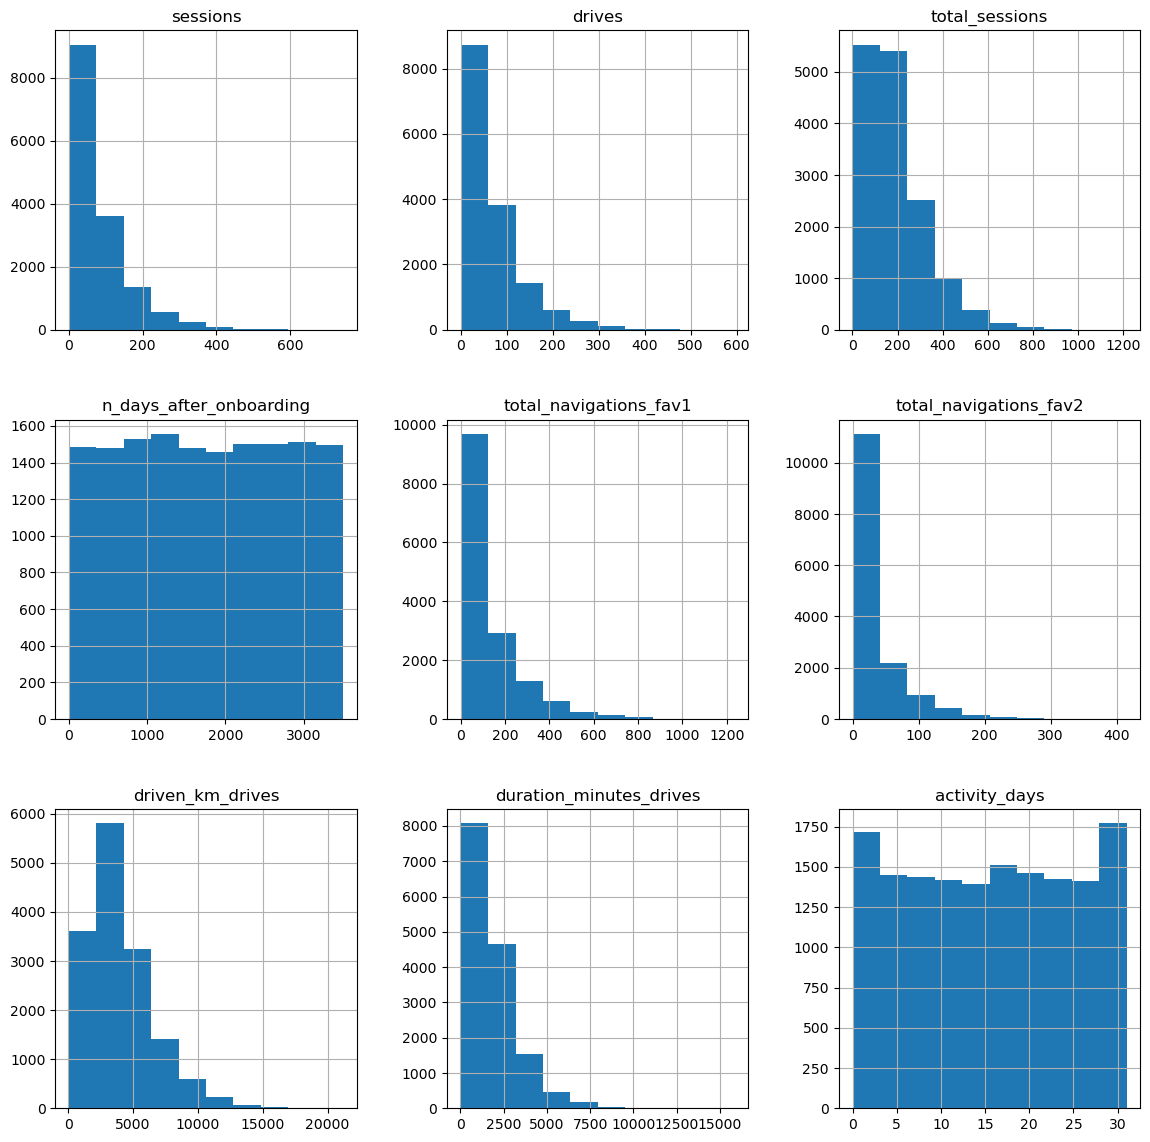

In [21]:
# creating histograms
df[numerical_cols].hist(figsize=(14, 14))
plt.show()

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

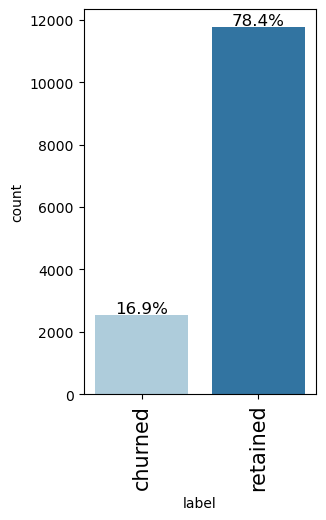

In [23]:
labeled_barplot(df, "label", perc=True)

* Approximately 78 percent of the data goes to the retained customers whiles 17 percent goes to the customers that churn
* The gap between the 2 features shows that the data is not balanced

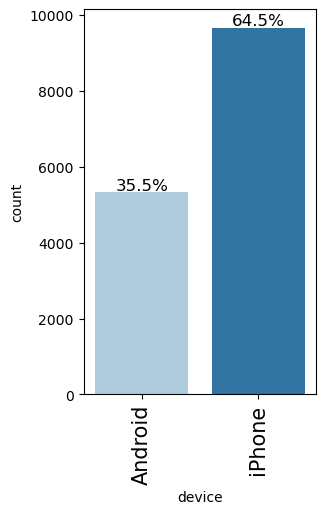

In [24]:
labeled_barplot(df, "device", perc=True)

* Most of the customers use iphones

In [25]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Parameters:
    - data: DataFrame containing your data.
    - feature: DataFrame column to be visualized.
    - figsize: Size of the figure (default (12,7)).
    - kde: Whether to show the density curve (default False).
    - bins: Number of bins for the histogram (default None).
    """
    # Create subplots for the box plot and histogram
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Create the box plot with the mean shown
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Create the histogram with the density curve (if specified) and optional custom bins
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add lines for the mean and median to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")



## Sessions

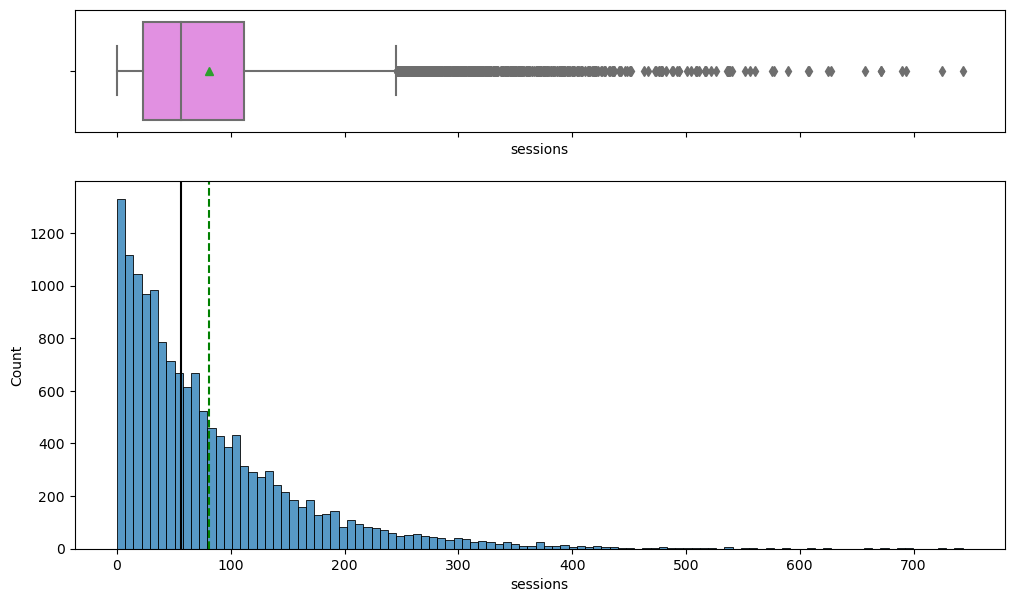

In [26]:
histogram_boxplot(df,'sessions')

* The distribution is skewed tot the right with some of the observations passing 700

## drives

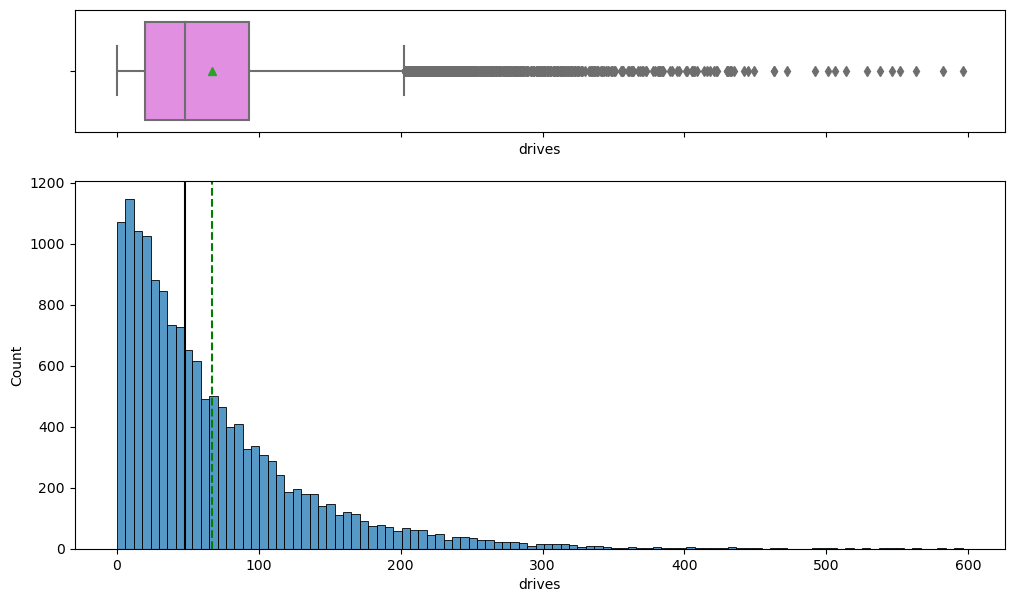

In [27]:
histogram_boxplot(df,'drives')

* The drives column is also right skewed with observations going up to 600

## total_sessions

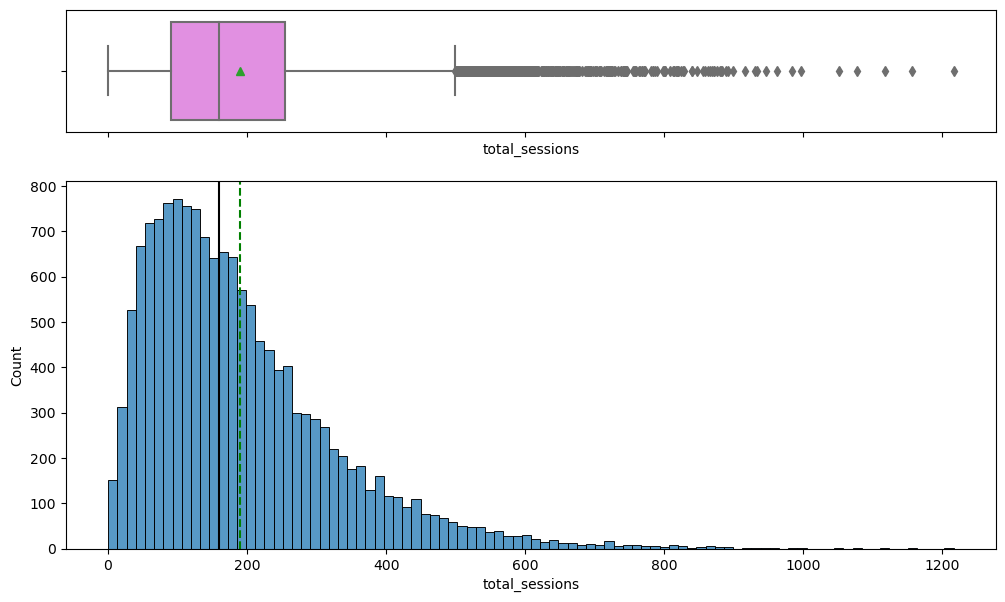

In [28]:
histogram_boxplot(df,'total_sessions')

* This distribution is also skewed but much better than the previous observations

## n_days_after_onboarding

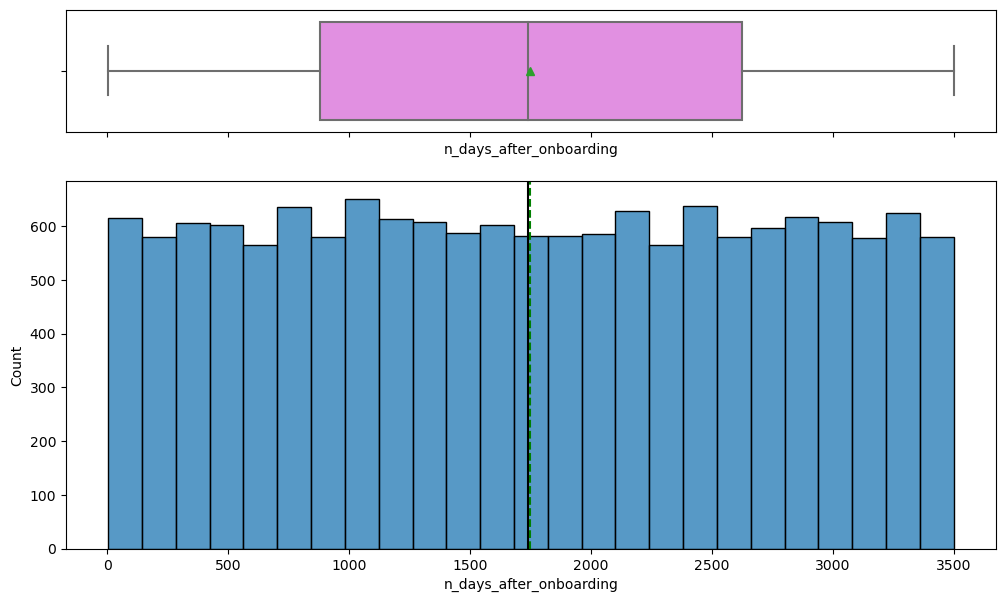

In [29]:
histogram_boxplot(df,'n_days_after_onboarding')

* This has a uniform distribution with the medium being 1741 days and ranging up to 3500 days which is approximately 9.5 years

## driven_km_drives

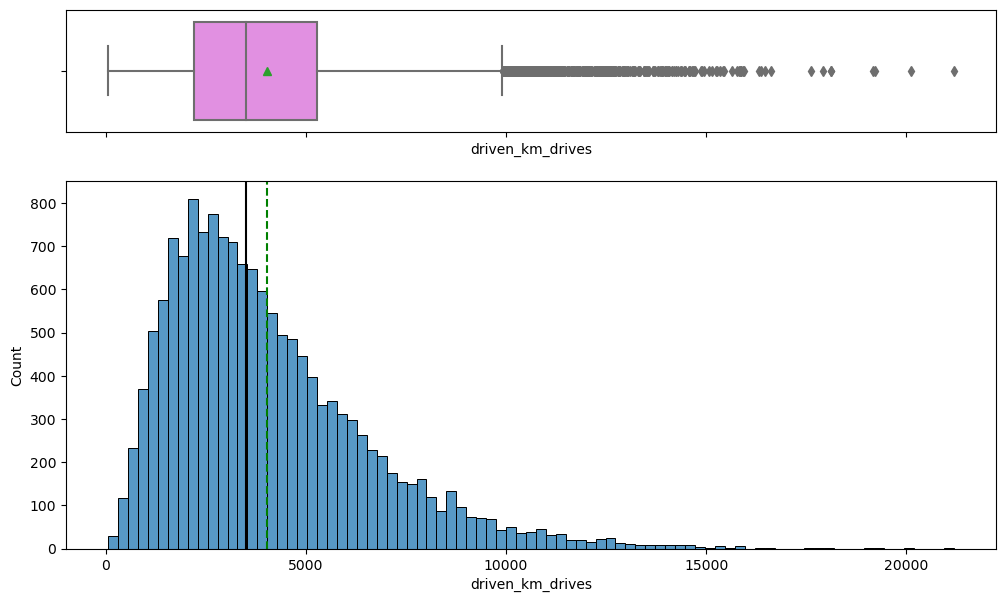

In [30]:
histogram_boxplot(df,'driven_km_drives')

* This column seems to be right skewed with individuals driving as far as 20,000 kilometers

## duration_minutes_drives

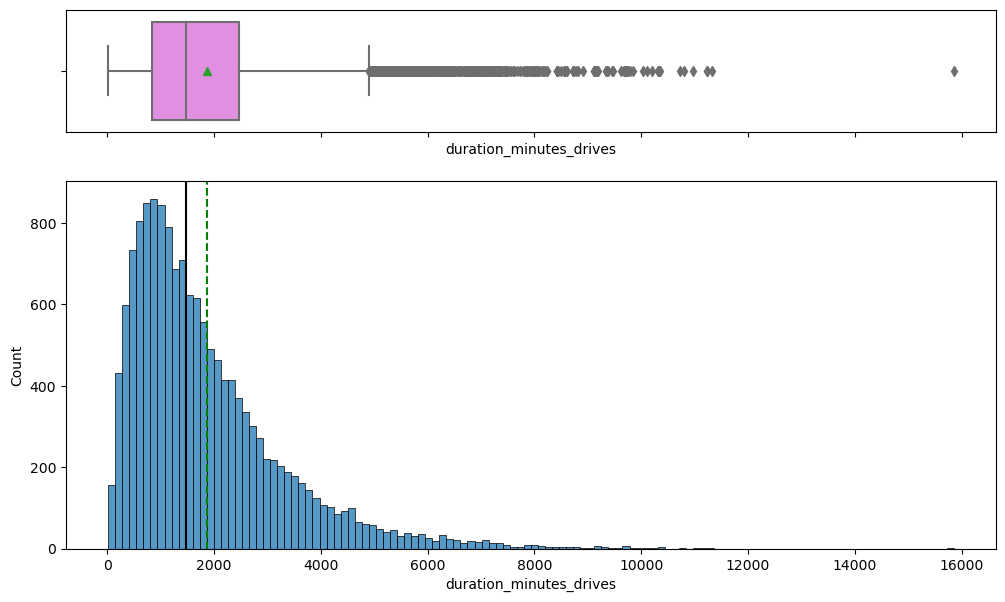

In [31]:
histogram_boxplot(df,'duration_minutes_drives')

* The data is heavily skewed to the right with half of the customers driving less than 1478 minutes

## activity_days

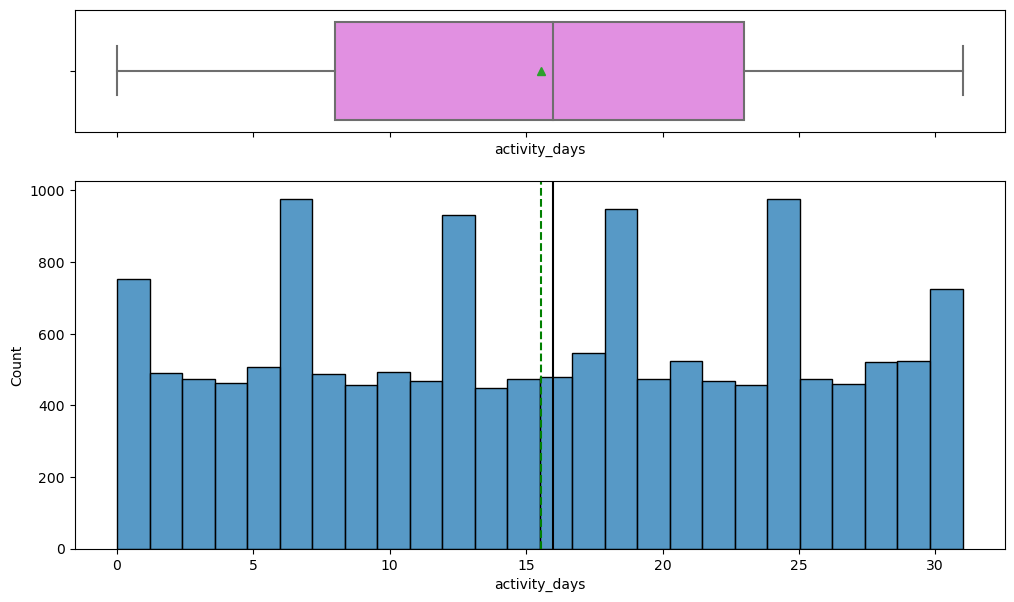

In [32]:
histogram_boxplot(df,'activity_days')

* This is a uniform distribution with people opening the app a median of 16 days and about 500 people opening the app everyday

## driving_days

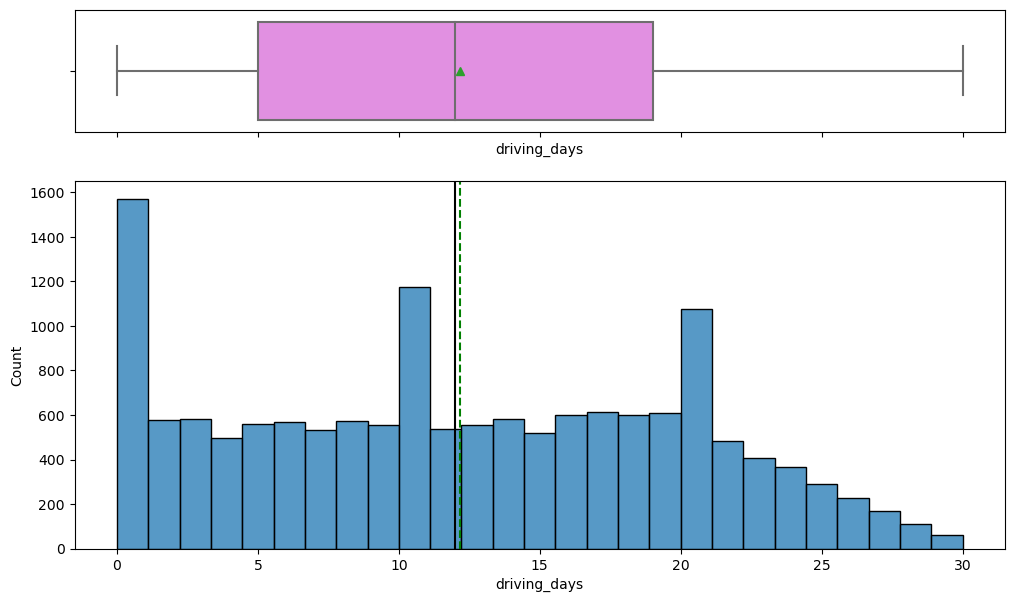

In [33]:
histogram_boxplot(df,'driving_days')

* This is almost uniformely correlated however it fals off at the right
* This does not correlate with the data from the activity_days 
* We will look at this better

## Multivariate Analysis

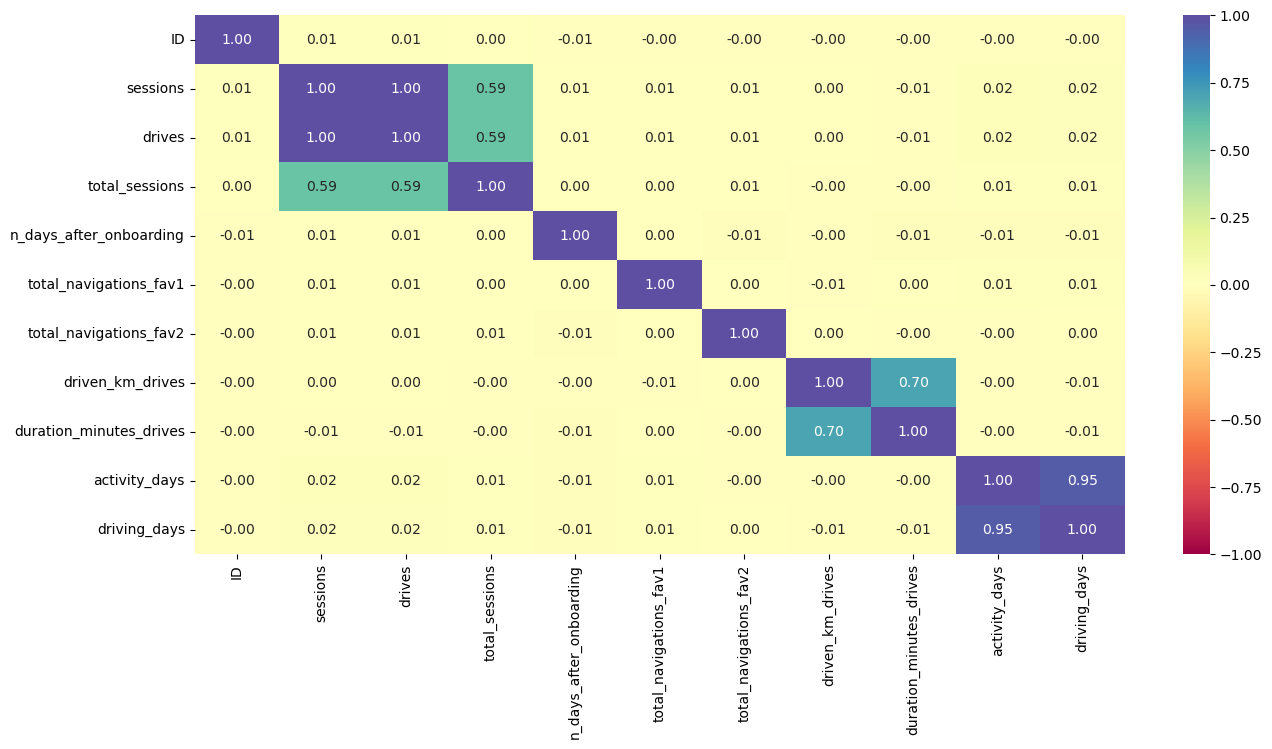

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* driving_days and activity_days are highly correlated with a correlation of 0.95
* duration_minutes_drives and driven_km_drives have a relatively high correlation of 0.7
* total_sessions is correlated to sessions by 0.59

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## driving_days vs activity_days

<Axes: xlabel='driving_days', ylabel='activity_days'>

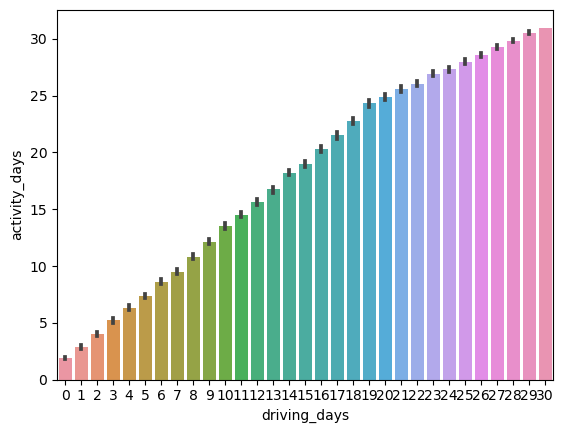

In [36]:
sns.barplot(data=df,x='driving_days',y='activity_days')

## Retention by device

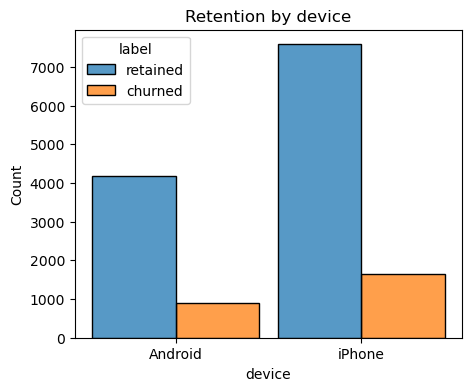

In [37]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device');

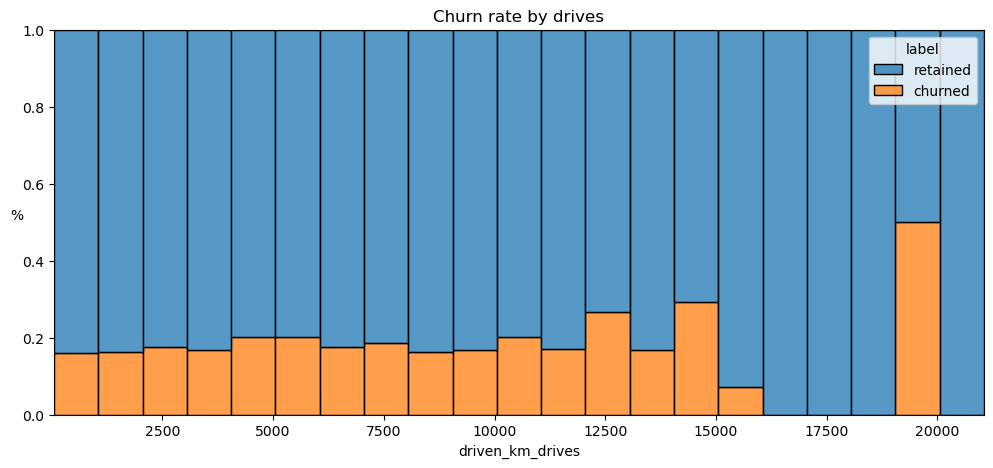

In [38]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driven_km_drives',
             bins=range(50, 22000, 1000),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by drives');

<Axes: xlabel='driven_km_drives', ylabel='label'>

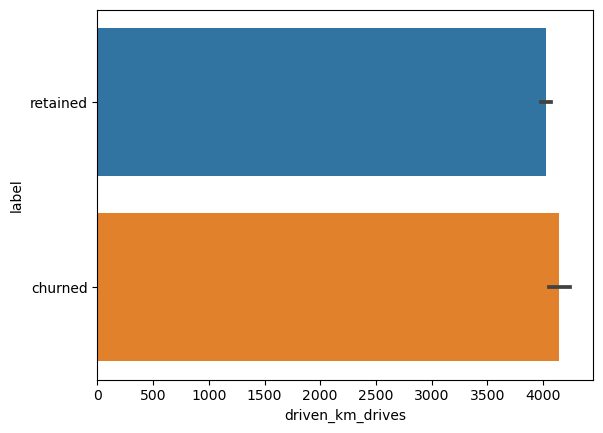

In [39]:
sns.barplot(data=df,x='driven_km_drives',y='label')

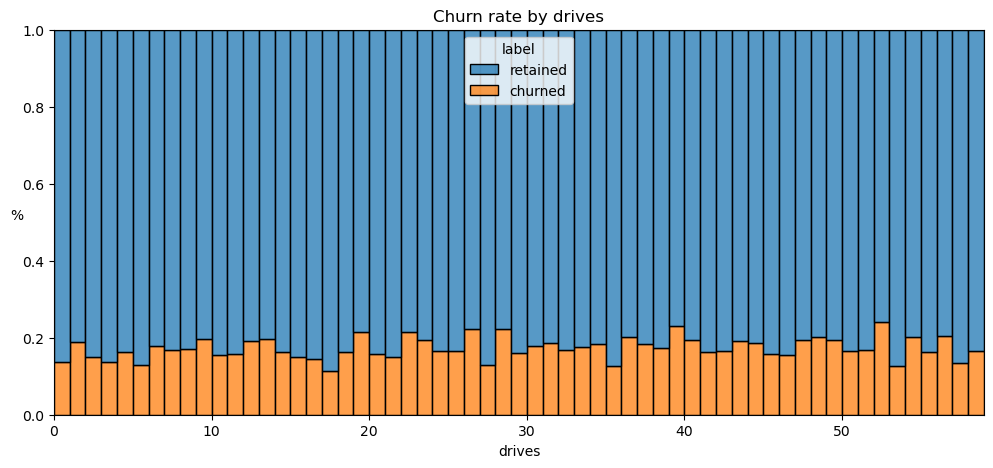

In [40]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='drives',
             bins=range(0, 60),
             #bins=range(0, 600, 10),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by drives');

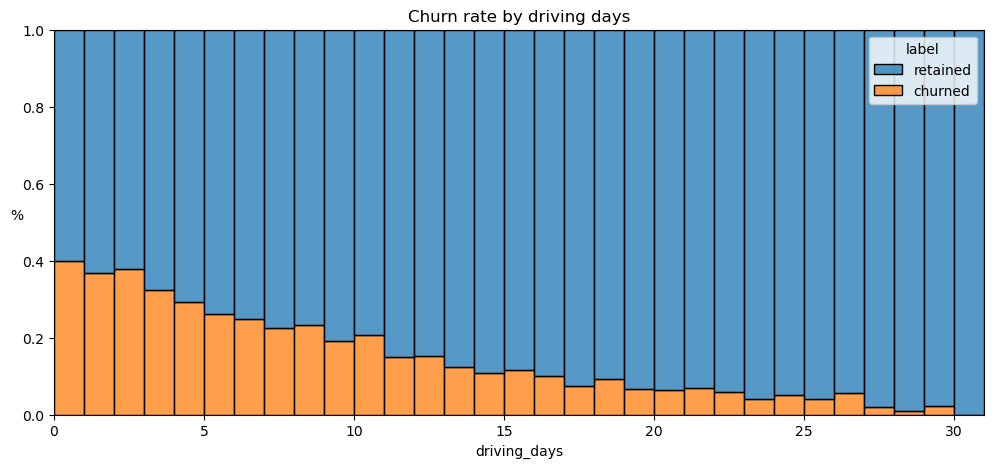

In [41]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(0, 32),
             #bins=range(0, 40, 10),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by driving days');

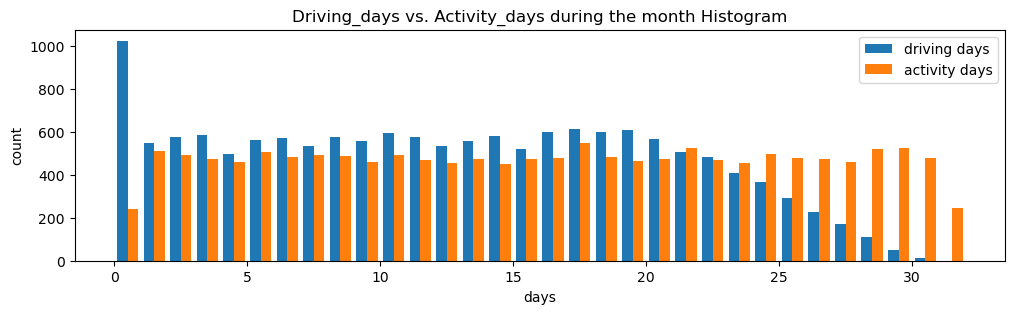

In [42]:
plt.figure(figsize=(12,3));
labels =['driving days', 'activity days']
plt.hist([df['driving_days'],df['activity_days']],bins=range(0,33),label=labels)
plt.title('Driving_days vs. Activity_days during the month Histogram')
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show();

## Dealing with Outliers

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


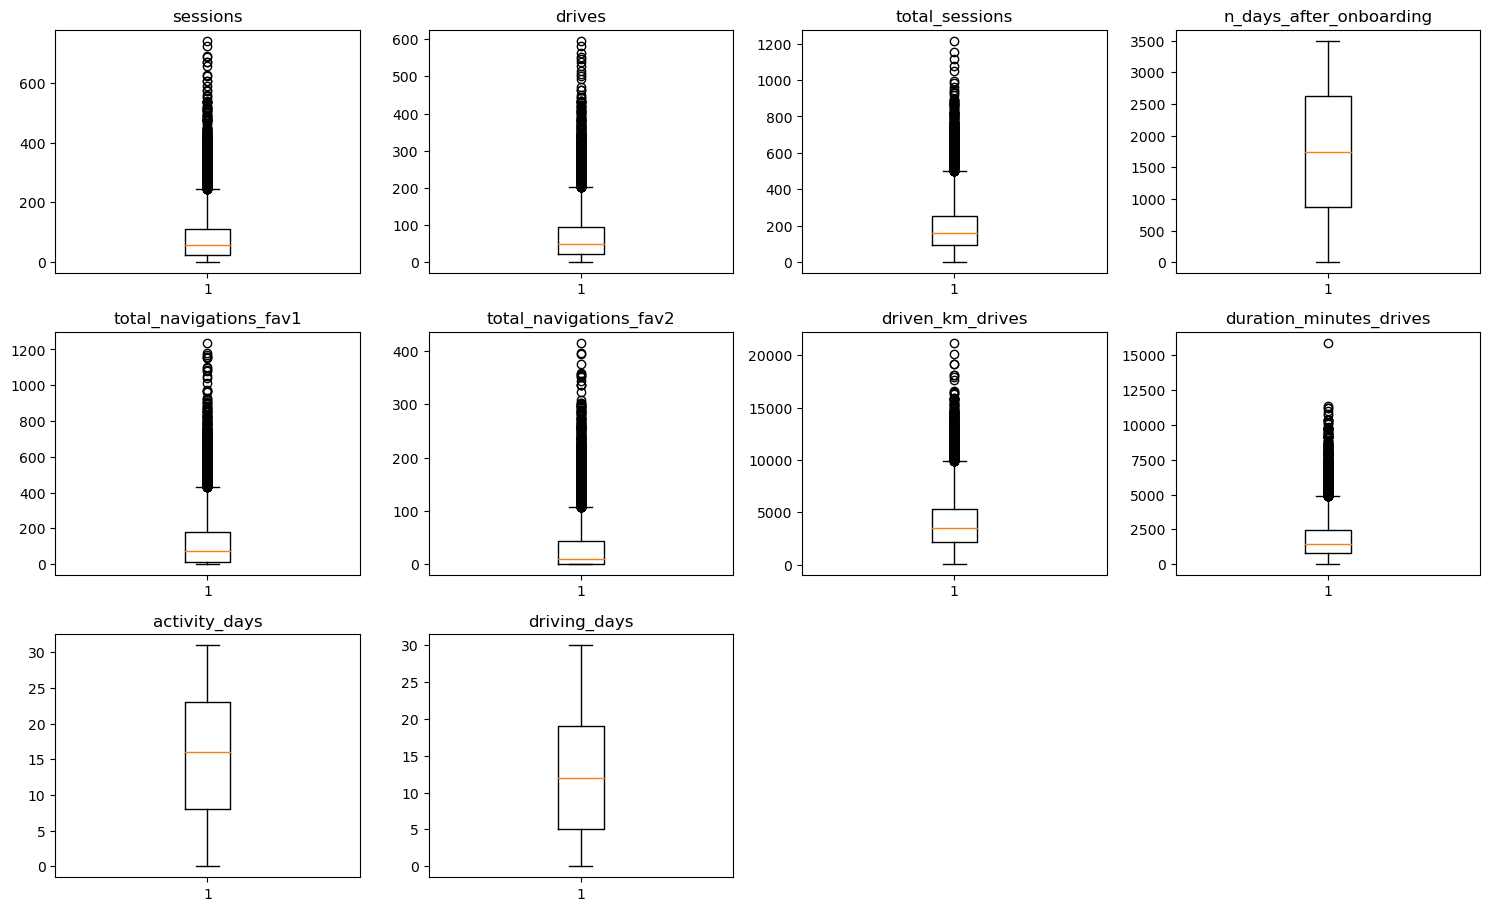

In [46]:
num_columns = ['sessions','drives','total_sessions','n_days_after_onboarding','total_navigations_fav1','total_navigations_fav2',
               'driven_km_drives','duration_minutes_drives','activity_days','driving_days']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [48]:
df[df['sessions']>250]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748,2276,208,0,2628.845,1985.775,28,19,Android
17,17,churned,272,219,564.271,88,0,90,3529.339,2078.427,11,11,Android
33,33,retained,291,233,568.723,275,39,9,2578.720,1703.292,15,15,iPhone
63,63,retained,253,203,298.674,1546,0,88,4695.169,2146.467,6,1,iPhone
88,88,retained,306,246,320.258,2252,60,0,3595.563,2420.120,28,20,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,14929,retained,319,257,324.308,1275,74,83,7403.931,1574.747,26,19,iPhone
14942,14942,retained,299,239,446.971,1378,141,12,4279.228,1950.297,12,8,iPhone
14946,14946,retained,326,261,745.443,1743,42,49,5129.333,2034.523,14,7,iPhone
14968,14968,churned,333,267,623.281,3260,28,24,2004.258,1522.308,10,7,Android


In [49]:
df[df['drives']>200]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748,2276,208,0,2628.845,1985.775,28,19,Android
17,17,churned,272,219,564.271,88,0,90,3529.339,2078.427,11,11,Android
33,33,retained,291,233,568.723,275,39,9,2578.720,1703.292,15,15,iPhone
63,63,retained,253,203,298.674,1546,0,88,4695.169,2146.467,6,1,iPhone
88,88,retained,306,246,320.258,2252,60,0,3595.563,2420.120,28,20,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,14929,retained,319,257,324.308,1275,74,83,7403.931,1574.747,26,19,iPhone
14942,14942,retained,299,239,446.971,1378,141,12,4279.228,1950.297,12,8,iPhone
14946,14946,retained,326,261,745.443,1743,42,49,5129.333,2034.523,14,7,iPhone
14968,14968,churned,333,267,623.281,3260,28,24,2004.258,1522.308,10,7,Android


In [50]:
df[df['total_sessions']>500]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
17,17,churned,272,219,564.271,88,0,90,3529.339,2078.427,11,11,Android
33,33,retained,291,233,568.723,275,39,9,2578.720,1703.292,15,15,iPhone
35,35,retained,156,127,780.947,101,113,0,1944.772,646.954,18,18,iPhone
96,96,churned,305,244,638.040,400,171,164,1896.894,960.975,19,13,Android
97,97,retained,0,0,559.547,2879,0,0,6668.844,3511.370,28,24,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14874,14874,churned,539,433,551.296,572,106,0,10999.843,5082.230,15,10,Android
14887,14887,retained,236,189,501.005,482,259,0,6825.695,3339.655,16,16,Android
14946,14946,retained,326,261,745.443,1743,42,49,5129.333,2034.523,14,7,iPhone
14967,14967,retained,228,188,562.903,1386,6,117,2802.821,725.399,30,22,iPhone


In [51]:
df[df['total_navigations_fav1']>200]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748,2276,208,0,2628.845,1985.775,28,19,Android
3,3,retained,49,40,67.589,15,322,7,913.591,587.197,7,3,iPhone
20,20,retained,52,42,144.714,2937,306,0,1601.896,951.889,7,7,iPhone
22,22,churned,73,60,118.809,1607,254,92,2653.437,400.707,16,16,iPhone
23,23,churned,29,23,33.137,2188,338,0,4283.504,654.519,2,2,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14979,14979,churned,60,48,157.264,1609,383,48,2517.943,1327.730,26,24,Android
14983,14983,retained,48,40,50.824,2488,504,0,5340.491,2513.410,13,8,Android
14989,14989,retained,6,6,153.374,2988,371,24,1553.284,833.421,23,20,iPhone
14993,14993,NaN,67,57,97.570,1131,207,102,2267.053,318.121,27,26,iPhone


In [52]:
df[df['total_navigations_fav2']>100]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
53,53,retained,84,68,123.518,3286,74,145,1558.792,1201.029,17,15,iPhone
56,56,churned,150,127,187.708,2028,208,132,1396.462,496.621,0,0,iPhone
93,93,retained,52,46,58.279,613,223,183,4742.486,3196.945,20,20,iPhone
96,96,churned,305,244,638.040,400,171,164,1896.894,960.975,19,13,Android
113,113,retained,91,73,168.252,3045,198,187,792.476,490.317,21,13,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14961,14961,retained,99,81,132.953,20,57,147,5320.714,1949.306,20,16,Android
14963,14963,retained,11,10,17.978,2753,110,211,1308.719,364.433,18,14,iPhone
14967,14967,retained,228,188,562.903,1386,6,117,2802.821,725.399,30,22,iPhone
14991,14991,churned,50,41,102.445,1463,0,121,4094.536,2201.984,4,2,iPhone


In [53]:
df[df['driven_km_drives']>10000]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
1,1,retained,133,107,326.897,1225,19,64,13715.921,3160.473,13,11,iPhone
30,30,retained,78,66,484.572,2381,106,21,10573.020,6978.070,31,26,iPhone
59,59,retained,23,20,24.465,1924,169,0,11556.277,4966.841,27,26,Android
62,62,retained,69,56,81.666,1356,373,0,11014.870,9143.800,24,23,iPhone
131,131,retained,25,25,716.078,2739,0,11,11009.293,205.863,19,17,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,14872,churned,54,54,327.222,1472,437,0,13477.238,6440.871,6,6,iPhone
14874,14874,churned,539,433,551.296,572,106,0,10999.843,5082.230,15,10,Android
14895,14895,retained,1,1,142.095,3411,0,0,10463.177,5190.566,11,11,Android
14896,14896,retained,89,73,192.053,1800,170,15,12282.933,9715.710,30,28,iPhone


In [54]:
df[df['duration_minutes_drives']>5000]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
10,10,retained,23,20,117.226,1946,0,36,8554.914,5352.568,9,9,iPhone
13,13,retained,80,64,132.831,3154,39,16,8531.248,6324.273,1,0,Android
30,30,retained,78,66,484.572,2381,106,21,10573.020,6978.070,31,26,iPhone
37,37,retained,16,14,103.894,443,0,5,8786.114,7181.044,19,19,Android
62,62,retained,69,56,81.666,1356,373,0,11014.870,9143.800,24,23,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14943,14943,NaN,48,38,96.797,555,0,6,8266.129,5902.352,19,19,iPhone
14950,14950,retained,41,36,167.242,288,53,18,9717.129,6115.177,11,7,Android
14956,14956,retained,42,33,226.555,2662,27,0,9593.016,6335.908,29,24,Android
14959,14959,retained,21,18,187.530,2922,43,26,7721.574,5661.036,19,14,Android


In [55]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [56]:
# Percentage of outliers in each column
((df[num_columns] < lower_whisker) | (df[num_columns] > upper_whisker)).sum()/df.shape[0]*100

sessions                  4.860
drives                    4.894
total_sessions            3.434
n_days_after_onboarding   0.000
total_navigations_fav1    4.754
total_navigations_fav2    6.847
driven_km_drives          3.087
duration_minutes_drives   4.294
activity_days             0.000
driving_days              0.000
dtype: float64

In [57]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [58]:
# treating outliers of sessions driven column
df = treat_outliers(df,'sessions')

# treating outliers of drives column
df = treat_outliers(df,'drives')

# treating outliers of tota_sessions column
df = treat_outliers(df,'total_sessions')

# treating outliers of driven_km_drives column
df = treat_outliers(df,'driven_km_drives')

# treating outliers of duration_minutes_drives column
df = treat_outliers(df,'duration_minutes_drives')

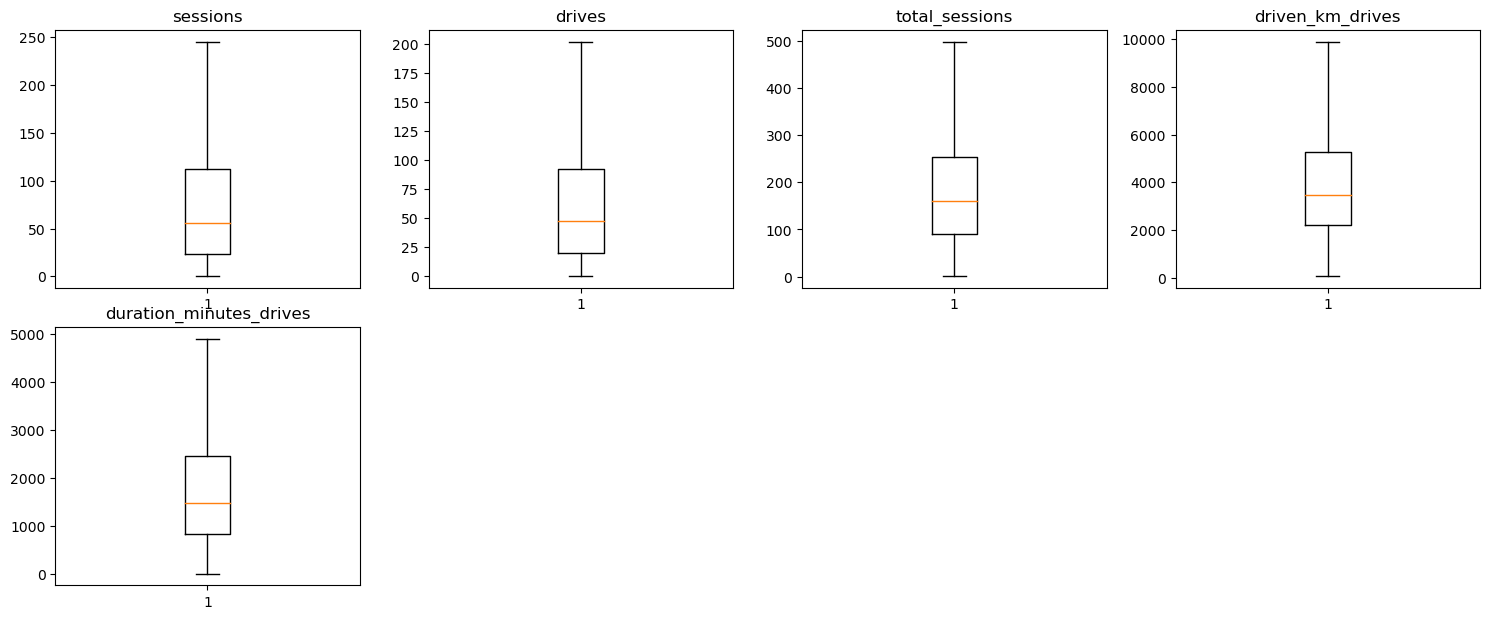

In [60]:
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated 
numeric_columns = ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Columns where we intended to deal with outliers have been successfully dealt with
* Our new boxplot above gives us that evidence

## Dropping missing values

In [61]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

* The number of missing values in the label column constitutes less than 5% of the data and also that there is no evidence of non randomness hence it is safe to drop them

In [63]:
df.dropna(inplace=True)

In [64]:
df.isna().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [65]:
# Converting the device column into a binary one
df['device_type'] = df.device.map({'Android': 0, 'iPhone': 1})

df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,245.500,202.500,296.748,2276,208,0,2628.845,1985.775,28,19,Android,0
1,1,retained,133.000,107.000,326.897,1225,19,64,9905.752,3160.473,13,11,iPhone,1
2,2,retained,114.000,95.000,135.523,2651,0,0,3059.149,1610.736,14,8,Android,0
3,3,retained,49.000,40.000,67.589,15,322,7,913.591,587.197,7,3,iPhone,1
4,4,retained,84.000,68.000,168.247,1562,166,5,3950.202,1219.556,27,18,Android,0


In [66]:
# Converting the label column into a binary one
df['label'] = df.label.map({'retained': 0, 'churned': 1})

df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,0,245.500,202.500,296.748,2276,208,0,2628.845,1985.775,28,19,Android,0
1,1,0,133.000,107.000,326.897,1225,19,64,9905.752,3160.473,13,11,iPhone,1
2,2,0,114.000,95.000,135.523,2651,0,0,3059.149,1610.736,14,8,Android,0
3,3,0,49.000,40.000,67.589,15,322,7,913.591,587.197,7,3,iPhone,1
4,4,0,84.000,68.000,168.247,1562,166,5,3950.202,1219.556,27,18,Android,0


In [67]:
df = df.drop(columns=['ID', 'device'])
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_type
0,0,245.500,202.500,296.748,2276,208,0,2628.845,1985.775,28,19,0
1,0,133.000,107.000,326.897,1225,19,64,9905.752,3160.473,13,11,1
2,0,114.000,95.000,135.523,2651,0,0,3059.149,1610.736,14,8,0
3,0,49.000,40.000,67.589,15,322,7,913.591,587.197,7,3,1
4,0,84.000,68.000,168.247,1562,166,5,3950.202,1219.556,27,18,0


## Feature Engineering

In [68]:
# creating km_per_driving_day feature which will represent the mean number of kilometers driven on each driving day in the last month for each user.
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

count   14299.000
mean          inf
std           NaN
min         3.022
25%       167.562
50%       324.179
75%       749.474
max           inf
Name: km_per_driving_day, dtype: float64

In [69]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count   14299.000
mean      572.848
std       992.138
min         0.000
25%       136.168
50%       273.301
75%       550.320
max      9905.752
Name: km_per_driving_day, dtype: float64

In [70]:
# creating professional_driver feature that is a 1 for users who had 60 or more drives AND drove on 15+ days in the last month.
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [71]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

0    11811
1     2488
Name: professional_driver, dtype: int64


In [72]:
# creating a column representing the mean kilometers per hour driven in the last month.
df['km_per_hour'] = df.driven_km_drives / (df.duration_minutes_drives / 60)

df['km_per_hour'].describe()

count   14299.000
mean      190.337
std       337.422
min        72.013
25%        92.488
50%       121.732
75%       191.928
max     23642.921
Name: km_per_hour, dtype: float64

## Model Building

In [73]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_type,km_per_driving_day,professional_driver,km_per_hour
0,0,245.500,202.500,296.748,2276,208,0,2628.845,1985.775,28,19,0,138.360,1,79.430
1,0,133.000,107.000,326.897,1225,19,64,9905.752,3160.473,13,11,1,900.523,0,188.056
2,0,114.000,95.000,135.523,2651,0,0,3059.149,1610.736,14,8,0,382.394,0,113.953
3,0,49.000,40.000,67.589,15,322,7,913.591,587.197,7,3,1,304.530,0,93.351
4,0,84.000,68.000,168.247,1562,166,5,3950.202,1219.556,27,18,0,219.456,1,194.343


In [74]:
# splitting the data
#Defining the Target Variable
X = df.drop("label", axis=1)
y = df["label"]

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [75]:
X_train.shape , X_test.shape, X_val.shape

((11439, 14), (2860, 14), (2860, 14))

## Random Forest

In [86]:
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer, recall_score

# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

precision_scorer = make_scorer(precision_score, zero_division=0)

# Define your scorer for recall
recall_scorer = make_scorer(recall_score)

# 3. Define a dictionary of scoring metrics to capture
scoring = {'Precision': precision_scorer,
           'Recall': 'recall',
           'Accuracy': 'accuracy',
           'F1': 'f1'
          }

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='Recall')

In [87]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 7min 1s
Wall time: 7min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='Recall',
             scoring={'Accuracy': 'accuracy', 'F1': 'f1',
                      'Precision': make_scorer(precision_score, response_method='predict', zero_division=0),
                      'Recall': 'recall'})

In [88]:
# Examine best score
rf_cv.best_score_

0.1296174424202892

In [89]:
# Examine best hyperparameter combination
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [92]:
table = pd.DataFrame(columns= ['Model','Precision','Recall','F1','Accuracy'])
                         
    
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what we want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Creating a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_Precision',
                   'recall': 'mean_test_Recall',
                   'f1': 'mean_test_F1',
                   'accuracy': 'mean_test_Accuracy'
                  }

    
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolating the row of the df with the max(metric) score
    best_estimator = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extracting Accuracy, Precision, Recall, and F1 score from best metric row
    df_dict = {'Model' : model_name,
               'Precision': best_estimator.mean_test_Precision,
               'Recall': best_estimator.mean_test_Recall,
               'Accuracy': best_estimator.mean_test_Accuracy,
               'F1': best_estimator.mean_test_F1
              }
  
    global table
    table.loc[len(table)] = df_dict
                     
    return table

In [93]:
results = make_results('RF cv', rf_cv, 'recall')
results

,Model,Precision,Recall,F1,Accuracy
0,RF cv,0.457,0.130,0.202,0.818


* the metrics are all low except the accuracy which gives an 81 percent

## XGBoost

In [96]:
# 1. Instantiating the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Creating a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.01, 0.1],
            'n_estimators': [50,100,500],
            'min_child_weight': [2,5,10],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'max_depth': [2,5],
            }

precision_scorer = make_scorer(precision_score, zero_division=0)

# 3. Defining a dictionary of scoring metrics to capture
scoring = {'Precision': precision_scorer,
           'Recall': 'recall',
           'Accuracy': 'accuracy',
           'F1': 'f1'
          }

# 4. Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='Recall')

In [97]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 24min
Wall time: 8min 53s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [2, 5],
                         'min_child_weight': [2, 5, 10],
                         'n_estimators': [50, 100, 500], 'subsample': [0.7]},
             refit='Recall',
             scoring={'Accuracy': 'accuracy', 'F1': 'f1',
                      'Precision': make_scorer(precision_score, response_method='predict', zero_division=0),
                      'Recall': 'recall'})

In [98]:
# Examine best score
xgb_cv.best_score_

0.17002128565346958

In [99]:
# Examine best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 500,
 'subsample': 0.7}

In [100]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,Model,Precision,Recall,F1,Accuracy
0,RF cv,0.457,0.130,0.202,0.818
1,XGB cv,0.439,0.170,0.245,0.814
0,RF cv,0.457,0.130,0.202,0.818
1,XGB cv,0.439,0.170,0.245,0.814


* the model maintains a similar accuracy as the random forest model as well as the precision score however fits data better than the random forest model

## Model Selection

* Perform model valication to identify the best performing model and continue to evaluate the model performance

### Random Forest

In [101]:
# Predicting on validation data using random forest model
y_val_pred = rf_cv.best_estimator_.predict(X_val)

In [102]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Our choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for our model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy]
                          })

    return table

In [103]:
rf_val = get_test_scores('RF VAL', y_val_pred, y_val)

table = pd.concat([table, rf_val], axis=0).reset_index(drop=True)

table

,Model,Precision,Recall,F1,Accuracy
0,RF cv,0.457,0.130,0.202,0.818
1,XGB cv,0.439,0.170,0.245,0.814
2,RF VAL,1.000,0.959,0.979,0.993


### XGBoost

In [104]:
# Predicting on validation data using XGBoost model
xgb_val_pred = xgb_cv.best_estimator_.predict(X_val)

xgb_val = get_test_scores('XGB VAL', xgb_val_pred, y_val)

table = pd.concat([table, xgb_val], axis=0).reset_index(drop=True)

table

,Model,Precision,Recall,F1,Accuracy
0,RF cv,0.457,0.130,0.202,0.818
1,XGB cv,0.439,0.170,0.245,0.814
2,RF VAL,1.000,0.959,0.979,0.993
3,XGB VAL,0.976,0.645,0.777,0.934


* The drop in training scores shows that the model is not overfitting which is a good thing
* The xgboost is the winner

## Use XGBoost model to predict on test data

In [105]:
y_final_pred = xgb_cv.best_estimator_.predict(X_test)

xgb_final = get_test_scores('XGB Final',y_final_pred, y_test)

table = pd.concat([table, xgb_final], axis=0).reset_index(drop=True)

In [106]:
table

,Model,Precision,Recall,F1,Accuracy
0,RF cv,0.457,0.130,0.202,0.818
1,XGB cv,0.439,0.170,0.245,0.814
2,RF VAL,1.000,0.959,0.979,0.993
3,XGB VAL,0.976,0.645,0.777,0.934
4,XGB Final,0.435,0.172,0.246,0.814


## Confusion matrix

Plotting a confusion matrix of the XGBoost model's predictions on the test data.

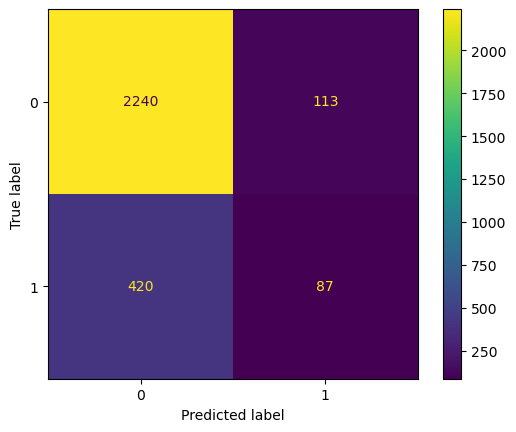

In [107]:
cm = confusion_matrix(y_test, y_final_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= xgb_cv.classes_)

disp.plot()

## Feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

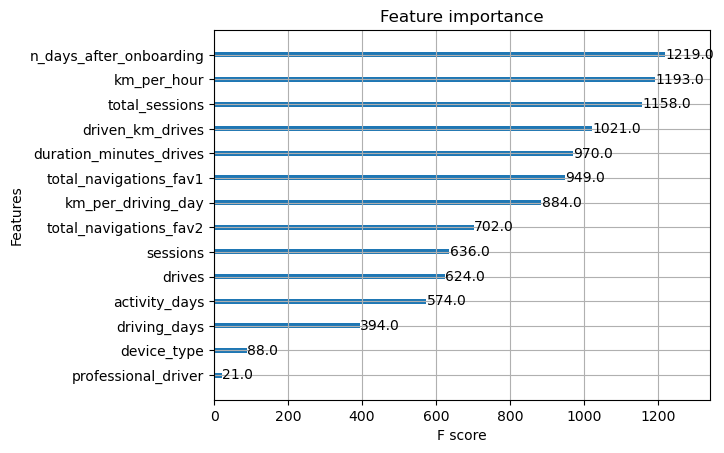

In [110]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost modelutilized a lot of features we added during the feature engineering stage